In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Define groups of columns for each plot
care = [
    "Have_Website",
    "Post Annual Report",
    "Have sustainability section in annual report",
    "Post separate Sustainability Report"
]
environment = [
    "GHG emissions measurement",
    "Energy resource management",
    "Renewable energy adoption",
    "Raw material management",
    " Water resource management",
    "Net Zero Alignment",
    "Environmental policy investment"
]
social = [
    "Community Development Programs",
    "Employee Welfare and Safety",
    "Diversity & Inclusion"
]
governance = [
    "Stakeholder Identification and Mapping",
    "Structured Engagement Mechanisms",
    "Feedback Integration Systems",
    "Transparency and Reporting Standards",
    "Risk Management Framework",
    "Anti-Corruption Measures"
]
scores = care + environment + social + governance

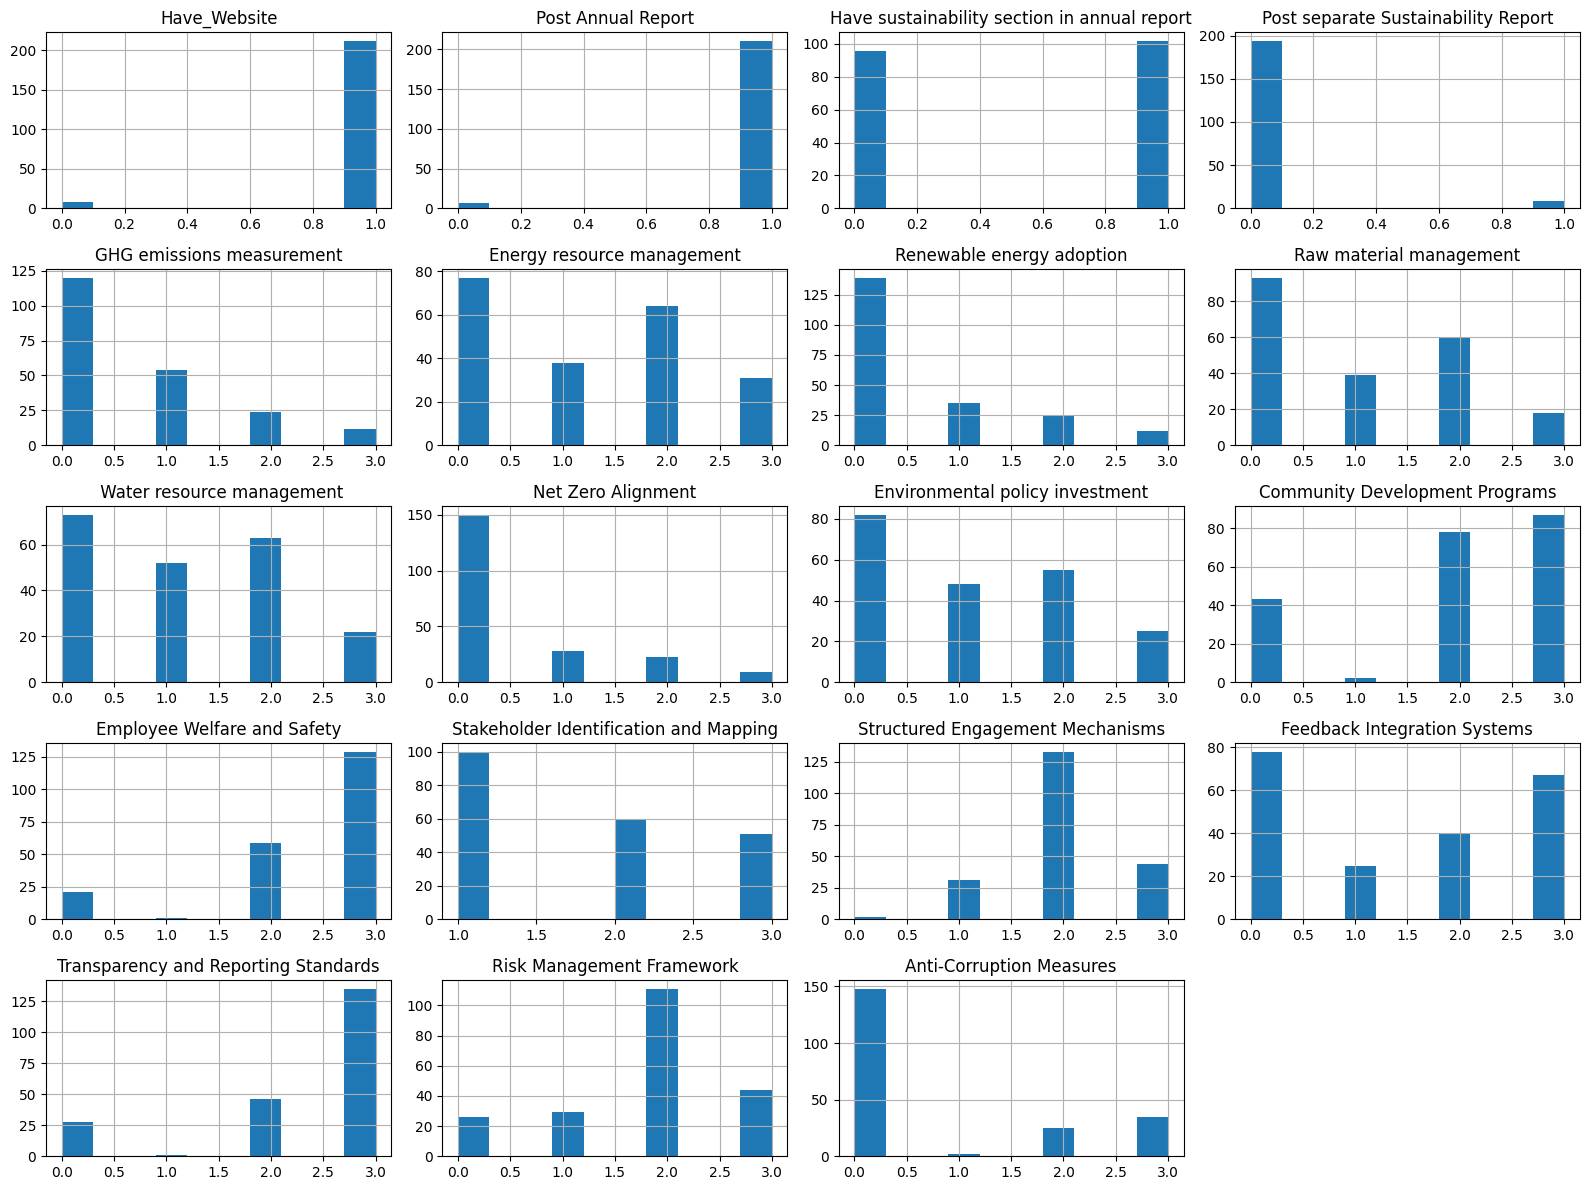

In [3]:
df = pd.read_excel(rf"C:\Users\thuhi\Downloads\rating sheet (4).xlsx")
df.drop(columns=["Corporation size","Financial indicators"],inplace=True)
# Histogram of all numeric columns in the dataframe
# Plot histogram for all score columns in df
score_cols = [
    "Have_Website",
    "Post Annual Report",
    "Have sustainability section in annual report",
    "Post separate Sustainability Report",
    "GHG emissions measurement",
    "Energy resource management",
    "Renewable energy adoption",
    "Raw material management",
    " Water resource management",
    "Net Zero Alignment",
    "Environmental policy investment",
    "Community Development Programs",
    "Employee Welfare and Safety",
    "Diversity & Inclusion",
    "Stakeholder Identification and Mapping",
    "Structured Engagement Mechanisms",
    "Feedback Integration Systems",
    "Transparency and Reporting Standards",
    "Risk Management Framework",
    "Anti-Corruption Measures"
]

df[score_cols].hist(figsize=(16, 12), bins=10, layout=(5, 4))
plt.tight_layout()
plt.show()

In [4]:
cols_to_fill = ["Have sustainability section in annual report",
"Post separate Sustainability Report"]
df[cols_to_fill] = df[cols_to_fill].fillna(0)
df_na = df.dropna(how="any")
df_na["Diversity & Inclusion"] = df_na["Diversity & Inclusion"].astype(float)


C:\Users\thuhi\AppData\Local\Temp\ipykernel_9936\1173670720.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na["Diversity & Inclusion"] = df_na["Diversity & Inclusion"].astype(float)


In [5]:



import matplotlib.pyplot as plt



# Calculate mean of scores and unique count of company names per group
mean_scores = df_na.groupby(["Industry_Group", "Year"])[scores].mean()
name_count = df_na.groupby(["Industry_Group"])["Name"].nunique().rename("unique_count")
year_count = df_na.groupby(["Industry_Group","Year"])["Name"].count().rename("year_count")
# Combine mean scores and name count into a single DataFrame
mean_scores = mean_scores.join(name_count)

mean_scores = mean_scores.join(year_count)

In [6]:
mean_scores["care"] = mean_scores[environment[0]] +  mean_scores[care[1]]  +  mean_scores[care[2]] +  mean_scores[care[3]]  
mean_scores["environment"] = mean_scores[environment[0]] +  mean_scores[environment[1]]  +  mean_scores[environment[2]] +  mean_scores[environment[3]]  +  mean_scores[environment[4]]  +  mean_scores[environment[5]] +  mean_scores[environment[6]]  
mean_scores["social"] = mean_scores[social[0]] + mean_scores[social[1]] + mean_scores[social[2]]
mean_scores["governance"] = (
    mean_scores[governance[0]] +
    mean_scores[governance[1]] +
    mean_scores[governance[2]] +
    mean_scores[governance[3]] +
    mean_scores[governance[4]] +
    mean_scores[governance[5]]
)

In [7]:
mean_scores[['care','environment',"social","governance","unique_count","year_count"]]

care  environment    social  governance  \
Industry_Group Year                                                  
G1             2014.0  1.777778     3.555556  4.000000    9.666667   
               2015.0  1.666667     3.888889  4.555556    9.222222   
               2016.0  1.800000     5.100000  5.100000    9.200000   
               2017.0  1.833333     4.500000  4.750000    8.750000   
               2018.0  1.916667     5.500000  4.916667    8.750000   
               2019.0  2.000000     5.666667  4.666667    8.833333   
               2020.0  2.090909     6.636364  5.636364    9.000000   
               2021.0  2.230769     7.307692  5.692308    9.000000   
               2022.0  2.333333     7.916667  5.583333    9.166667   
               2023.0  2.222222     8.000000  5.666667    9.333333   
               2024.0  2.181818     7.727273  5.272727    9.454545   
G2             2014.0  1.000000     0.000000  2.333333    9.666667   
               2015.0  1.000000     0.666667  4.000000    9.666667   
               2016.0  1.000000     1.000000  4.666667    9.666667   
               2017.0  1.200000     2.400000  3.800000    8.000000   
               2018.0  1.600000     4.400000  4.800000    9.000000   
               2019.0  2.200000     5.200000  5.800000   10.200000   
               2020.0  2.333333     7.333333  6.666667   10.666667   
               2021.0  3.000000     8.333333  7.000000   13.333333   
               2022.0  2.500000     7.000000  7.500000   11.500000   
               2023.0  2.500000     7.000000  7.500000   11.500000   
               2024.0  3.000000     7.000000  7.500000   11.500000   
G3             2014.0  1.600000     4.400000  3.000000   11.400000   
               2015.0  1.600000     4.400000  3.600000   11.400000   
               2016.0  2.000000     5.000000  4.600000   12.000000   
               2017.0  2.200000     5.000000  4.600000   12.600000   
               2018.0  2.600000     5.000000  5.800000   12.600000   
               2019.0  2.800000     6.400000  5.800000   12.800000   
               2020.0  3.400000    10.600000  5.800000   13.400000   
               2021.0  3.600000    11.000000  5.800000   13.400000   
               2022.0  3.600000    11.800000  5.800000   13.400000   
               2023.0  3.400000    11.400000  5.800000   13.400000   
               2024.0  4.000000    13.000000  6.250000   14.000000   

                       unique_count  year_count  
Industry_Group Year                              
G1             2014.0            18           9  
               2015.0            18           9  
               2016.0            18          10  
               2017.0            18          12  
               2018.0            18          12  
               2019.0            18          12  
               2020.0            18          11  
               2021.0            18          13  
               2022.0            18          12  
               2023.0            18           9  
               2024.0            18          11  
G2             2014.0             5           3  
               2015.0             5           3  
               2016.0             5           3  
               2017.0             5           5  
               2018.0             5           5  
               2019.0             5           5  
               2020.0             5           3  
               2021.0             5           3  
               2022.0             5           2  
               2023.0             5           2  
               2024.0             5           2  
G3             2014.0             5           5  
               2015.0             5           5  
               2016.0             5           5  
               2017.0             5           5  
               2018.0             5           5  
               2019.0             5           5  
               2020.0             5           5  
               2021.0     

### Table: Mean ESG Scores by Industry Group and Year

The table above presents the mean ESG (Environmental, Social, and Governance) scores for each industry group, broken down by year. This table is constructed by grouping the dataset by both `Industry_Group` and `Year`, then calculating the average for each ESG-related feature. Additionally, it includes two important columns: `unique_count`, which represents the number of unique companies within each industry group, and `year_count`, which indicates the number of records for each group-year combination.

This table serves as a foundational summary for the EDA, enabling a multi-dimensional comparison of ESG performance. By examining the mean scores, we can identify which industry groups are leading or lagging in specific ESG dimensions over time. For example, a consistently high `environment` score in a particular group may suggest a strong commitment to environmental practices, while a low or stagnant `governance` score could highlight areas for improvement. The inclusion of `unique_count` and `year_count` helps contextualize these averages, ensuring that observed trends are not driven by outliers or small sample sizes.

The table also facilitates the detection of temporal trends. By comparing scores across years within the same group, we can assess whether ESG performance is improving, declining, or remaining stable. This is particularly valuable for stakeholders interested in tracking the impact of industry-wide initiatives, regulatory changes, or shifts in corporate strategy. Furthermore, the table can reveal disparities between groups, highlighting sectors that may require targeted interventions or support.

In summary, this table is a critical tool for understanding the landscape of ESG performance across industries and time. It provides a clear, quantitative basis for further analysis, guiding the interpretation of subsequent visualizations and supporting data-driven decision-making in ESG strategy and policy development.


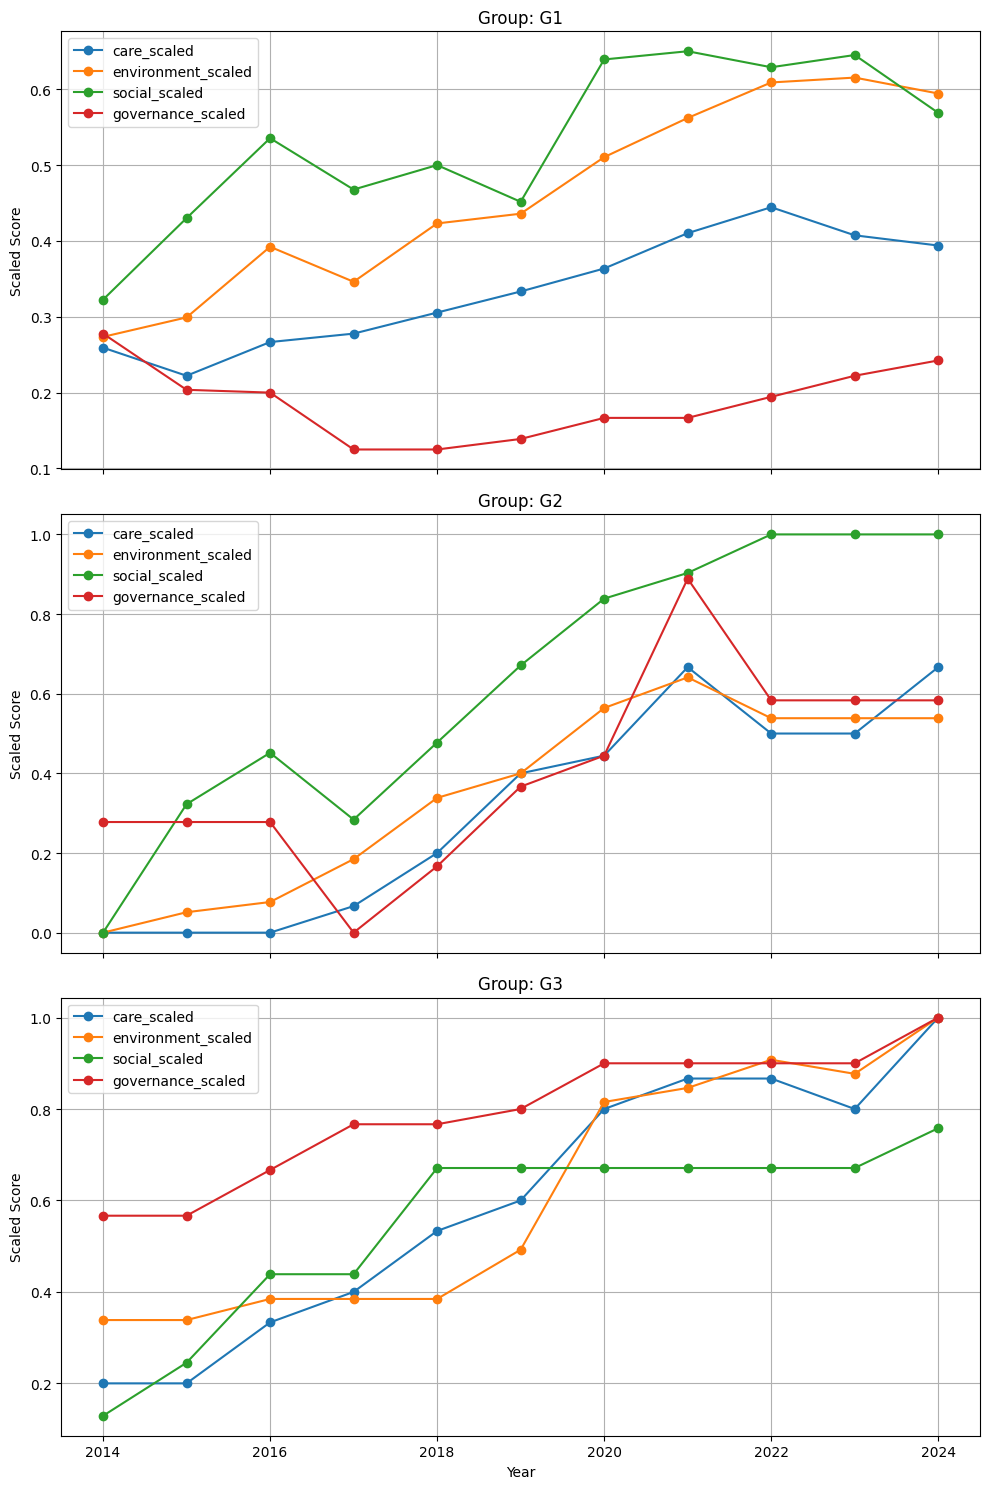

In [8]:
from sklearn.preprocessing import MinMaxScaler



# Scale the scores to range 0,1 for care, environment, social, governance
scaler = MinMaxScaler()
scaled = scaler.fit_transform(mean_scores[['care', 'environment', 'social', 'governance']])
mean_scores[['care_scaled', 'environment_scaled', 'social_scaled', 'governance_scaled']] = scaled

groups = mean_scores.index.get_level_values(0).unique()
fig, axes = plt.subplots(len(groups), 1, figsize=(10, 5 * len(groups)), sharex=True)

if len(groups) == 1:
    axes = [axes]

for ax, group in zip(axes, groups):
    data = mean_scores.loc[group]
    data[['care_scaled', 'environment_scaled', 'social_scaled', 'governance_scaled']].plot(ax=ax, marker='o')
    ax.set_title(f'Group: {group}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Scaled Score')
    ax.legend(loc='upper left')
    ax.grid(True)

plt.tight_layout()  
plt.show()




### Chart: Scaled ESG Scores by Industry Group Over Time

The line charts above visualize the scaled ESG scores—specifically, `care`, `environment`, `social`, and `governance`—for each industry group across multiple years. Each subplot corresponds to a distinct industry group, and within each subplot, the four ESG dimensions are plotted as separate lines. The scores are scaled using MinMaxScaler, which normalizes the values to a range between 0 and 1, allowing for direct comparison across different dimensions and groups regardless of their original scales.

These charts are instrumental in revealing both intra-group and inter-group dynamics in ESG performance. Within each industry group, the relative positions and trajectories of the lines indicate which ESG dimensions are prioritized or neglected. For instance, a group with a steadily rising `environment` score but a flat `governance` line may be focusing its efforts on environmental initiatives while governance practices remain unchanged. Conversely, parallel upward trends across all dimensions suggest a holistic approach to ESG improvement.

Comparing subplots across groups uncovers broader industry patterns. Some groups may exhibit synchronized improvements, possibly due to shared regulatory pressures or industry standards, while others may diverge, reflecting unique challenges or strategic priorities. The use of scaled scores ensures that these comparisons are meaningful, as it eliminates the influence of differing absolute score ranges.

Temporal trends are also readily apparent. Upward slopes indicate progress, Sudden jumps or drops could correspond to significant events, such as new regulations, public controversies, or major investments in ESG initiatives. By examining these patterns, stakeholders can identify best practices, benchmark performance, and pinpoint areas requiring further attention.

Overall, these charts provide a nuanced, visual summary of ESG evolution within and across industry groups, supporting strategic planning and continuous improvement in corporate sustainability efforts.

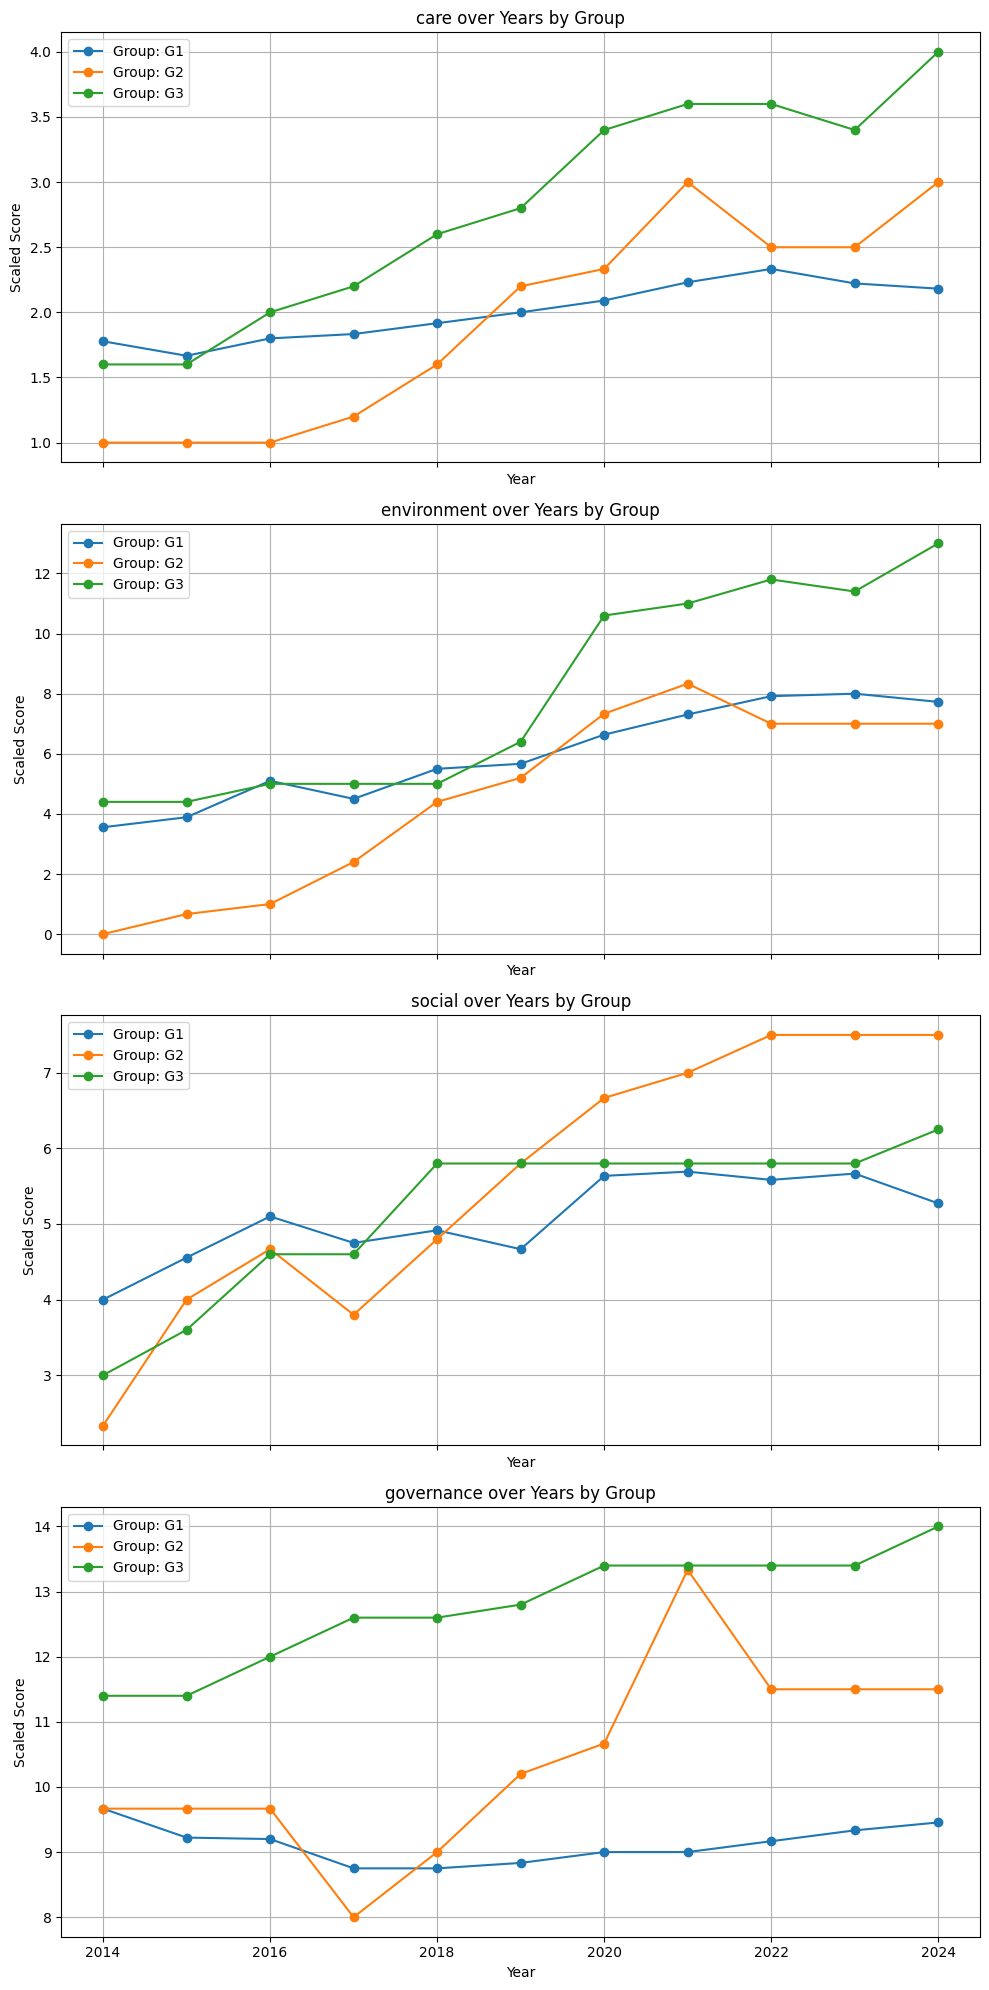

In [9]:
features = ['care', 'environment', 'social', 'governance']
years = mean_scores.index.get_level_values(1).unique()

fig, axes = plt.subplots(len(features), 1, figsize=(10, 5 * len(features)), sharex=True)

if len(features) == 1:
    axes = [axes]

for ax, feature in zip(axes, features):
    for group in groups:
        data = mean_scores.loc[group]
        ax.plot(data.index, data[feature], marker='o', label=f'Group: {group}')
    ax.set_title(f'{feature} over Years by Group')
    ax.set_xlabel('Year')
    ax.set_ylabel('Scaled Score')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


### Chart: ESG Feature Trends by Group Over Years

The set of line charts above illustrates the progression of each ESG feature—`care`, `environment`, `social`, and `governance`—across all industry groups over time. Each chart is dedicated to a single ESG dimension, with lines representing different industry groups. The x-axis denotes the years, while the y-axis shows the (scaled or raw) score for the respective feature.

This visualization is particularly effective for benchmarking and comparative analysis. By isolating each ESG dimension, it becomes easier to identify which industry groups are excelling or lagging in specific areas. For example, a group that consistently leads in `social` scores may have robust employee welfare programs or community engagement initiatives, while another group with lower `governance` scores might face challenges in transparency or risk management.

The temporal aspecs t of the charts allows for the detection of trends and shiftin performance. Upward trajectories suggest ongoing improvements, possibly driven by internal policies, stakeholder pressure, or regulatory changes. Conversely, downward trends or stagnation may indicate areas where progress has stalled or where new challenges have emerged. The presence of converging lines suggests that groups are becoming more similar in their ESG practices, potentially due to industry-wide standards or best practice sharing. Diverging lines, on the other hand, highlight growing disparities that may warrant further investigation.

These charts also facilitate the identification of outliers—groups that deviate significantly from the norm. Such outliers can serve as case studies for successful strategies or cautionary tales for pitfalls to avoid. Additionally, the visualization supports the assessment of the impact of external events, such as economic downturns or policy interventions, on ESG performance across different sectors.

In summary, these charts provide a clear, comparative view of how each ESG dimension evolves across industry groups, offering valuable insights for targeted improvement and strategic alignment.

In [10]:
# Group by 'Year' only and calculate mean for each score
# Group by 'Year' only and calculate mean for each score, and aggregate year_count and unique_count
# Calculate care, environment, social, governance columns for df_na before grouping
df_na = df_na.copy()
df_na['care'] = (
    df_na['Have_Website'] +
    df_na['Post Annual Report'] +
    df_na['Have sustainability section in annual report'] +
    df_na['Post separate Sustainability Report']
)
df_na['environment'] = (
    df_na['GHG emissions measurement'] +
    df_na['Energy resource management'] +
    df_na['Renewable energy adoption'] +
    df_na['Raw material management'] +
    df_na[' Water resource management'] +
    df_na['Net Zero Alignment'] +
    df_na['Environmental policy investment']
)
df_na['social'] = (
    df_na['Community Development Programs'] +
    df_na['Employee Welfare and Safety'] +
    df_na['Diversity & Inclusion']
)
df_na['governance'] = (
    df_na['Stakeholder Identification and Mapping'] +
    df_na['Structured Engagement Mechanisms'] +
    df_na['Feedback Integration Systems'] +
    df_na['Transparency and Reporting Standards'] +
    df_na['Risk Management Framework'] +
    df_na['Anti-Corruption Measures']
)

yearly_scores = df_na.groupby('Year')[['care', 'environment', 'social', 'governance']].mean()

# Add year_count (number of records per year)
yearly_scores['year_count'] = df_na.groupby('Year').size()

# Add unique_count (number of unique companies per year)
yearly_scores['unique_count'] = df_na.groupby('Year')['Name'].nunique()

# Plot the scores over years
yearly_scores

,care,environment,social,governance,year_count,unique_count
Year,,,,,,
2014.0,2.117647,3.176471,3.411765,10.176471,17,17
2015.0,2.117647,3.470588,4.176471,9.941176,17,17
2016.0,2.277778,4.388889,4.888889,10.055556,18,18
2017.0,2.363636,4.136364,4.500000,9.454545,22,22
2018.0,2.454545,5.136364,5.090909,9.681818,22,22
2019.0,2.590909,5.727273,5.181818,10.045455,22,22
2020.0,2.631579,7.789474,5.842105,10.421053,19,19
2021.0,2.714286,8.333333,5.904762,10.666667,21,21
2022.0,2.736842,8.842105,5.842105,10.526316,19,19




### Table: Yearly Mean ESG Scores and Company Counts

The table above summarizes the yearly mean scores for each ESG dimension—`care`, `environment`, `social`, and `governance`—across all companies in the dataset. It is generated by grouping the data solely by `Year` and calculating the average for each ESG feature. Two additional columns, `year_count` and `unique_count`, provide further context: `year_count` indicates the total number of records for each year, while `unique_count` reflects the number of unique companies represented in that year.

This table serves as a high-level overview of ESG performance trends over time. By focusing on annual averages, it smooths out company- and industry-specific fluctuations, revealing broader patterns that may be driven by macroeconomic factors, regulatory changes, or shifts in societal expectations. The inclusion of company counts ensures that the averages are interpreted in the context of data coverage—years with more companies or records may yield more robust and representative insights.

The table is particularly useful for identifying periods of significant change. For example, a sharp increase in the `environment` score in a particular year may correspond to the introduction of new environmental regulations or widespread adoption of green technologies. Conversely, a decline in `governance` scores could signal emerging challenges in corporate oversight or transparency. But it can also be affected by new company bringing in new results that may be worse or better than average, dragging or pulling the score. For example, 2017 witness 4 new company, which drag down the score becase these are not good. By examining the interplay between the different ESG dimensions, stakeholders can assess whether improvements are occurring in isolation or as part of a coordinated effort.

Furthermore, the table can highlight the impact of data availability on observed trends. Years with low `unique_count` values may be less reliable, as they are more susceptible to the influence of outliers. Recognizing these limitations is essential for drawing accurate conclusions and making informed decisions based on the data.

In essence, this table provides a concise yet comprehensive snapshot of ESG evolution at the aggregate level, supporting longitudinal analysis and strategic planning.

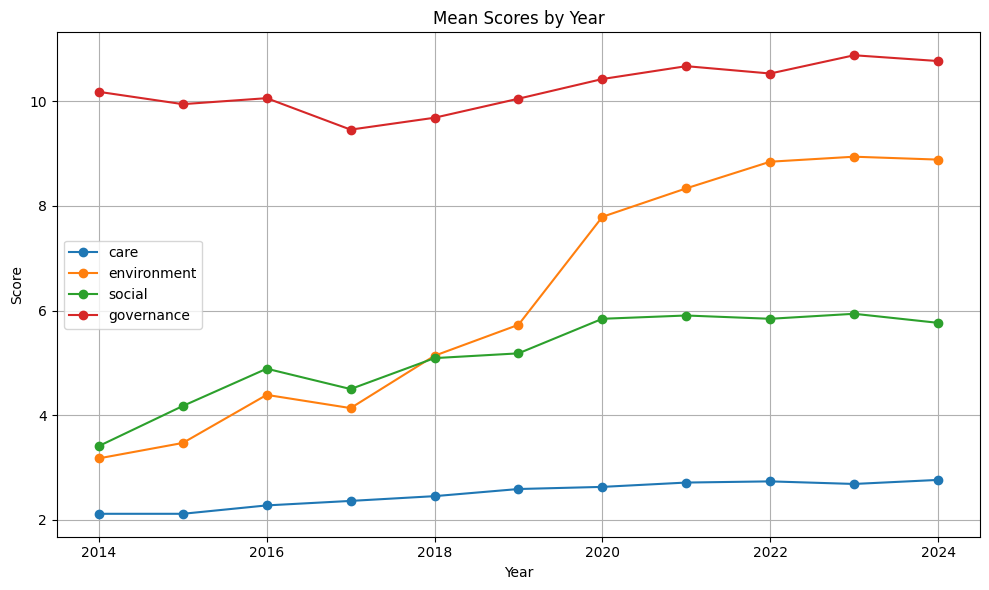

In [11]:
plt.figure(figsize=(10, 6))
for feature in ['care', 'environment', 'social', 'governance']:
    plt.plot(yearly_scores.index, yearly_scores[feature], marker='o', label=feature)

plt.title('Mean Scores by Year')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Chart: Mean ESG Scores by Year

The line chart above depicts the mean values of the four primary ESG dimensions—`care`, `environment`, `social`, and `governance`—for all companies, plotted across multiple years. Each line represents one ESG feature, with the x-axis indicating the year and the y-axis showing the average score for that dimension. This visualization provides a clear, aggregate-level view of how ESG performance has evolved over time within the dataset.

This chart is particularly valuable for identifying overarching trends and shifts in corporate sustainability practices. Upward trends in any of the lines suggest that, on average, companies are making progress in that ESG area. For example, a steady increase in the `environment` score may reflect growing awareness and action on environmental issues, possibly driven by regulatory changes, technological advancements, or shifting stakeholder expectations. Conversely, a plateau or decline in a particular dimension could indicate stagnation or emerging challenges that warrant further investigation.

The comparative aspect of the chart allows for the assessment of balance and alignment across ESG dimensions. If all lines rise in tandem, it suggests a holistic approach to ESG improvement. However, if certain dimensions lag behind, it may highlight areas where additional focus or resources are needed. The visualization also supports the identification of inflection points—years where the trajectory of a score changes direction—which can be linked to external events or internal policy shifts.

By providing a high-level summary of ESG trends, this chart serves as a starting point for deeper analysis. It enables stakeholders to quickly gauge the effectiveness of past initiatives, set benchmarks for future performance, and prioritize areas for strategic intervention. Ultimately, the chart transforms complex, multi-dimensional data into an accessible and actionable format for decision-makers.

## ESG Analysis Report

### Group G1 Analysis

- **Social_scaled (Green Line):**  
    Starts at ~0.3 in 2014, rises to 0.5 by 2016, dips to 0.45 in 2018, peaks at 0.65 in 2022, and settles at 0.6 by 2024.  
    *Interpretation:* Strong focus on social initiatives with sustained growth, despite minor fluctuations.

- **Environment_scaled (Orange Line):**  
    Begins at 0.3 in 2014, increases to 0.45 by 2018, accelerates to 0.6 by 2022, and maintains this level through 2024.  
    *Interpretation:* Consistent environmental improvement, with a notable uptick after 2018.

- **Care_scaled (Blue Line):**  
    Starts at 0.3 in 2014, remains around 0.35 until 2018, then rises gradually to 0.45 by 2024.  
    *Interpretation:* Moderate progress in care-related efforts.

- **Governance_scaled (Red Line):**  
    Begins at 0.3 in 2014, drops to 0.2 by 2016, stagnates at 0.15 until 2020, then climbs to 0.35 by 2024.  
    *Interpretation:* Initial stagnation in governance, with improvement only after 2020.

**Intra-group Dynamics:**  
Group G1 prioritizes social and environmental dimensions, as shown by higher scores and consistent upward trends. Care and governance lag, with governance showing delayed progress, indicating a strategic emphasis on social and environmental initiatives until later years.

---

### Group G2 Analysis

- **Social_scaled (Green Line):**  
    Starts at 0.0 in 2014, jumps to 0.4 by 2016, dips to 0.3 in 2018, surges to 1.0 by 2022, and holds steady through 2024.  
    *Interpretation:* Dramatic rise suggests a significant shift toward social performance, possibly due to investments or regulatory pressures post-2018.

- **Governance_scaled (Red Line):**  
    Begins at 0.3 in 2014, stays flat at 0.2 until 2018, spikes to 0.7 by 2020, then declines to 0.4 by 2024.  
    *Interpretation:* Temporary governance push around 2020, followed by a retreat.

- **Care_scaled (Blue Line):**  
    Starts at 0.1 in 2014, fluctuates between 0.1 and 0.2 until 2018, peaks at 0.8 in 2020, then drops to 0.6 by 2024.  
    *Interpretation:* Volatile pattern reflects inconsistent focus on care initiatives.

- **Environment_scaled (Orange Line):**  
    Begins at 0.1 in 2014, rises steadily to 0.5 by 2020, and levels off at 0.6 through 2024.  
    *Interpretation:* Moderate, consistent environmental progress.

**Intra-group Dynamics:**  
Group G2 exhibits high volatility, with social performance emerging as a clear priority by 2022. Governance and care show sharp fluctuations, suggesting reactive efforts, while environmental scores improve steadily but remain secondary.

---

### Group G3 Analysis

- **Governance_scaled (Red Line):**  
    Starts at 0.6 in 2014, rises to 0.8 by 2016, stabilizes around 0.85 until 2022, then reaches 1.0 by 2024.  
    *Interpretation:* Strong, consistent governance focus, achieving the maximum score.

- **Care_scaled (Blue Line):**  
    Begins at 0.3 in 2014, climbs to 0.6 by 2018, dips to 0.55 in 2020, then rises to 0.8 by 2024.  
    *Interpretation:* Steady improvement with minor setbacks.

- **Environment_scaled (Orange Line):**  
    Starts at 0.4 in 2014, increases to 0.5 by 2018, then surges to 0.9 by 2024.  
    *Interpretation:* Robust upward trend in environmental performance.

- **Social_scaled (Green Line):**  
    Begins at 0.3 in 2014, rises to 0.5 by 2016, plateaus around 0.55 until 2022, then reaches 0.7 by 2024.  
    *Interpretation:* Moderate progress with a late surge.

**Intra-group Dynamics:**  
Group G3 adopts a balanced approach, with all dimensions trending upward. Governance leads consistently, while care and environment also improve significantly, especially later in the period. Social performance, though advancing, trails slightly behind.

---

### Inter-group Comparisons

- **Group G1:** Steady but uneven progress; social (0.6) and environmental (0.6) scores lead by 2024, while care (0.45) and governance (0.35) trail. Indicates a focused but lopsided ESG strategy.
- **Group G2:** Most volatile; excels in social performance (1.0) by 2024, but with inconsistent governance (0.4) and care (0.6). Environmental scores (0.6) are moderate, suggesting a reactive, social-prioritized approach.
- **Group G3:** Balanced, consistent improvement; governance at 1.0, environment at 0.9, care at 0.8, and social at 0.7 by 2024. Reflects a holistic, governance-led ESG strategy.

---

### Temporal Trends

- **2018–2022:** Marks a pivotal shift across all groups.
    - **Group G1:** Environmental scores accelerate post-2018; governance improves after 2020.
    - **Group G2:** Sharp spikes in social (2022), governance (2020), and care (2020) scores, likely in response to specific events.
    - **Group G3:** Maintains steady progress, with late surges in environment and governance by 2024.

Overall, most dimensions trend upward, indicating growing ESG attention, though the pace and focus differ. Sudden jumps (e.g., Group G2’s social peak in 2022) may be tied to external drivers like policy changes.

---

### Conclusion

- **Group G1:** Emphasizes social and environmental initiatives, with slower governance and care progress.
- **Group G2:** Dramatically prioritizes social performance, with volatile efforts elsewhere.
- **Group G3:** Pursues a balanced, governance-led approach, achieving strong results across all dimensions.

**Stakeholder Implications:**  
These insights support benchmarking, adoption of best practices (e.g., Group G3’s consistency), and targeted improvements—such as addressing Group G1’s governance lag or Group G2’s care instability—to strengthen overall sustainability efforts.

In [12]:
mask = df_na["Name"].isin(df_na["Name"].value_counts()[lambda x: x >= 6].index)
df_filtered = df_na[mask]

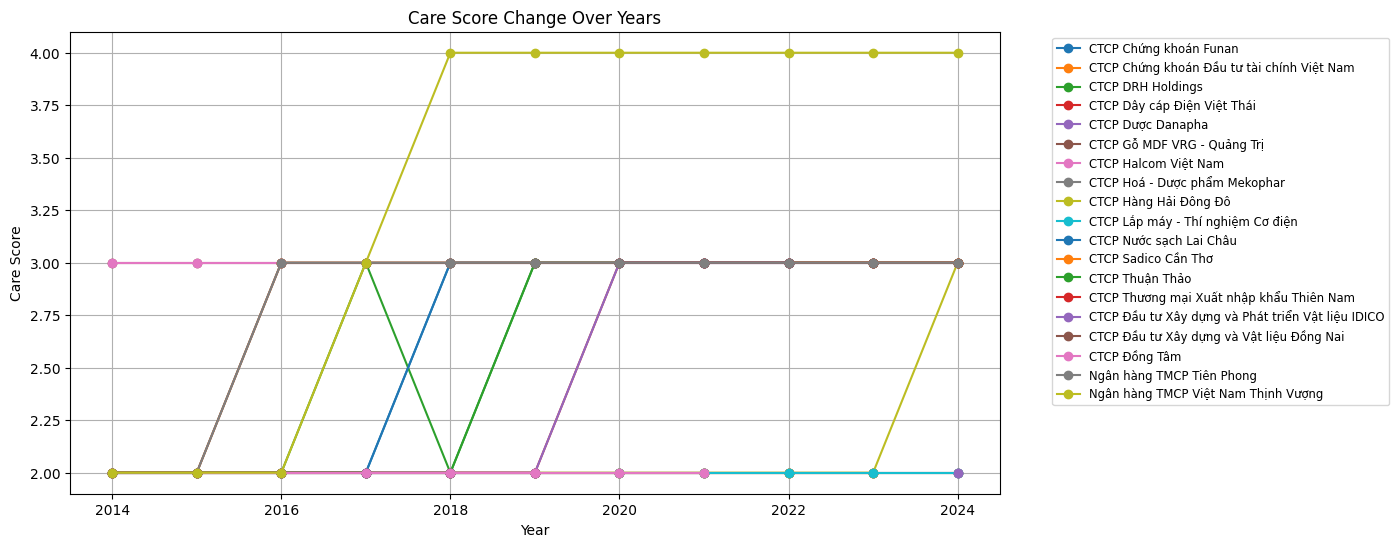

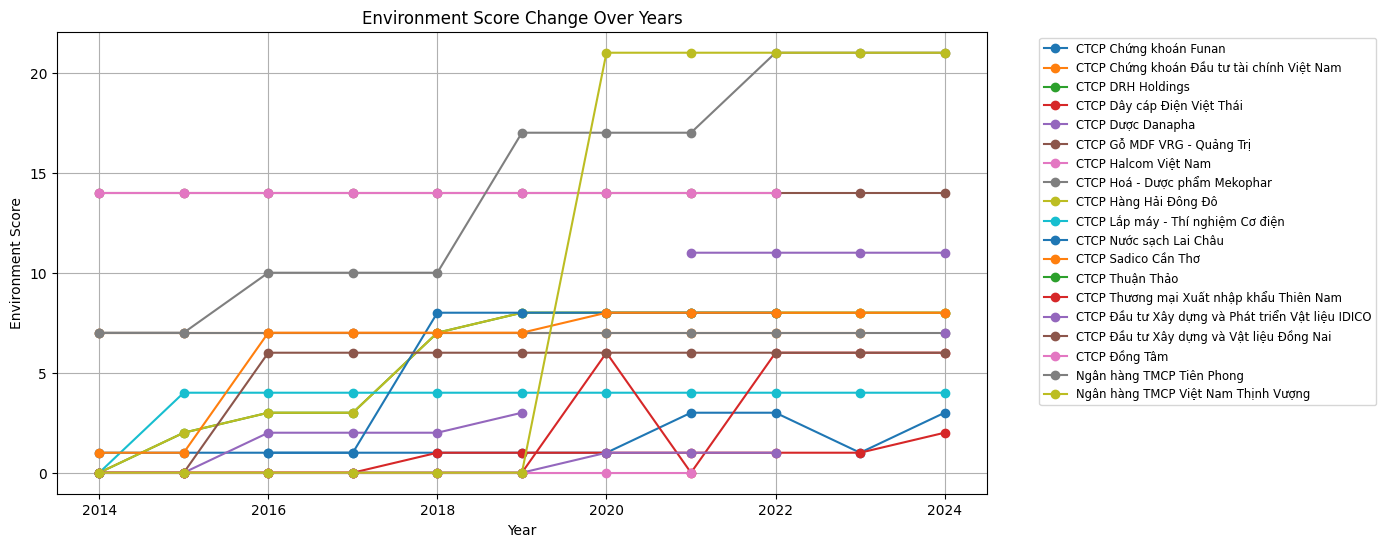

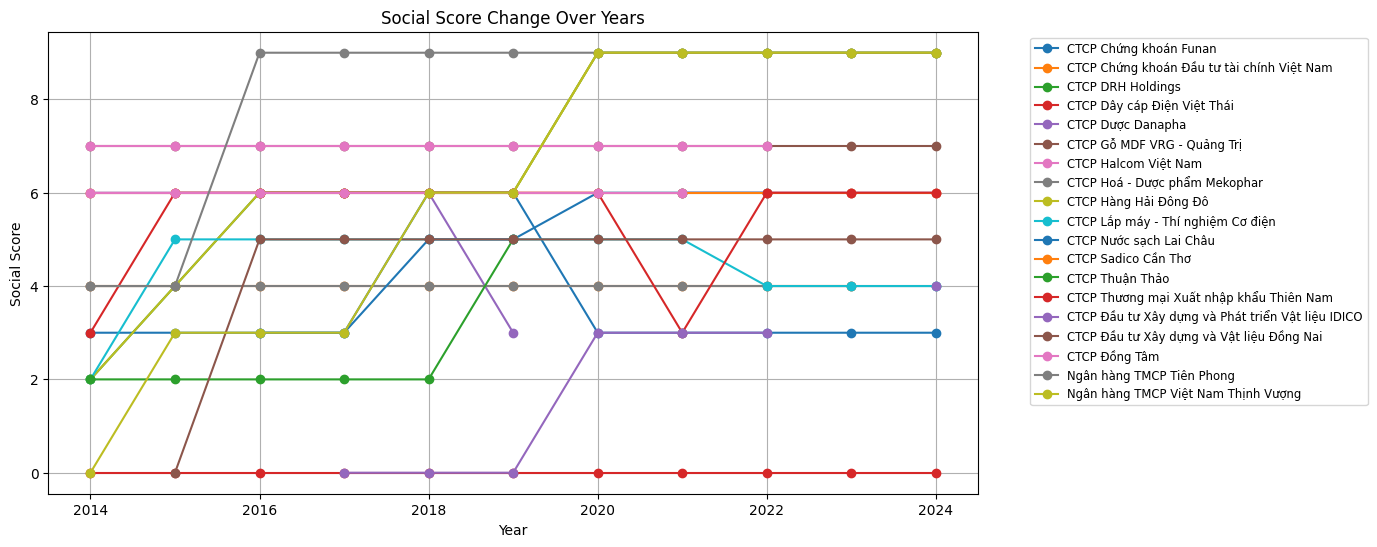

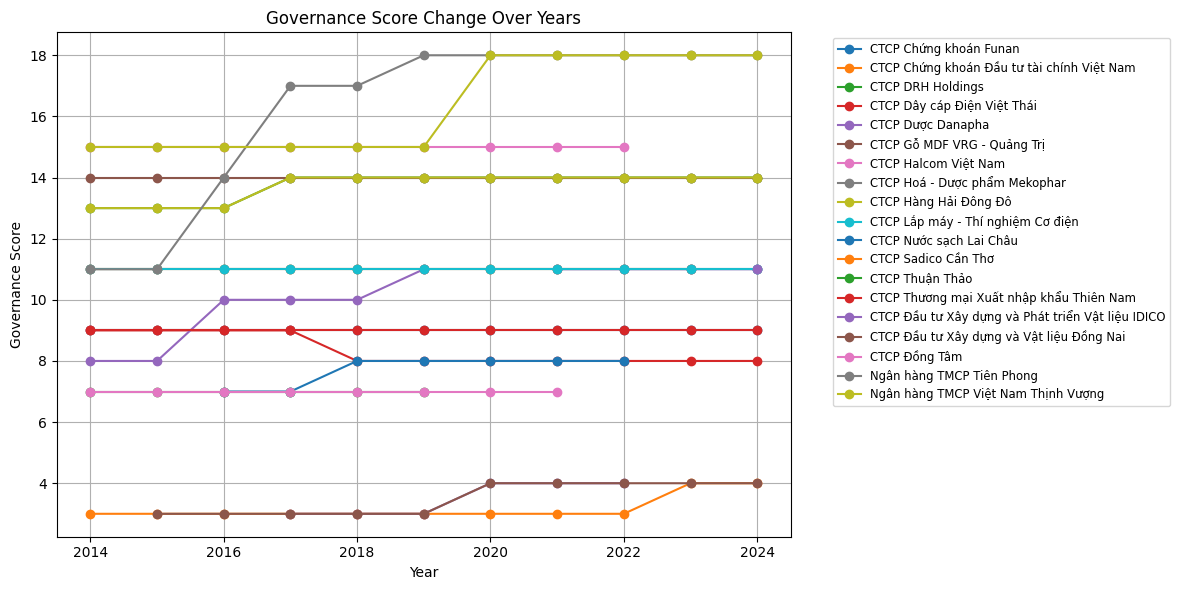

In [13]:
# Pivot df_filtered to wide format for care, environment, social, governance by year
wide = df_filtered.pivot_table(
    index="Name",
    columns="Year",
    values=["care", "environment", "social", "governance"]
)

# Flatten MultiIndex columns and format as 'score_year'
wide.columns = [f"{score}_{int(year)}" for score, year in wide.columns]
wide = wide.reset_index()
score_types = ["care", "environment", "social", "governance"]
years = sorted({int(col.split("_")[1]) for col in wide.columns if "_" in col and col.split("_")[1].isdigit()})

for score in score_types:
    plt.figure(figsize=(12, 6))
    for _, row in wide.iterrows():
        y = [row.get(f"{score}_{year}", np.nan) for year in years]
        plt.plot(years, y, marker='o', label=row["Name"])
    plt.title(f"{score.capitalize()} Score Change Over Years")
    plt.xlabel("Year")
    plt.ylabel(f"{score.capitalize()} Score")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.grid(True)
plt.tight_layout()
plt.show()

### Chart: Company-Level ESG Score Changes Over Years

The series of line charts above illustrates the evolution of ESG scores—`care`, `environment`, `social`, and `governance`—for individual companies with at least six years of data. Each chart focuses on a single ESG dimension, with lines representing the score trajectories of different companies over time. The x-axis denotes the years, while the y-axis shows the respective ESG score for each company.

These charts provide a granular perspective on ESG performance, revealing patterns and trends that may be obscured in aggregate analyses. By tracking individual companies, it becomes possible to identify consistent improvers, persistent laggards, and those exhibiting significant volatility. For example, a company with a steadily rising `social` score may have successfully implemented long-term employee welfare or community engagement programs, while another with erratic `governance` scores might be experiencing leadership changes or compliance challenges.

The visualization also supports peer benchmarking, enabling companies to compare their ESG journeys against those of their counterparts. Outliers—companies that significantly outperform or underperform the norm—can serve as case studies for best practices or cautionary tales. Additionally, the charts can highlight the impact of major events, such as mergers, acquisitions, or regulatory interventions, on individual ESG trajectories.

Temporal trends within companies are particularly informative. Sustained upward movements suggest effective, ongoing ESG strategies, while plateaus or declines may signal the need for renewed focus or corrective action. The presence of multiple companies in each chart allows for the detection of common patterns, such as industry-wide responses to external pressures or the diffusion of innovative practices.

In summary, these charts offer a detailed, company-level view of ESG evolution, supporting targeted analysis, strategic planning, and continuous improvement efforts.


### Analysis of Companies with Most Prominent Changes in ESG Scores

To identify the company with the most prominent changes in ESG scores based on the provided charts, we examine the `care`, `environment`, `social`, and `governance` score trajectories for companies with at least six years of data from 2014 to 2024. Prominent changes are characterized by significant upward or downward shifts, volatility, or consistent trends that stand out relative to others. Below is an analysis of each dimension, followed by the identification of the company with the most notable overall change.

---

### Care Score Changes

- **Ngân hàng TMCP Việt Nam Thịnh Vượng (Yellow Line):** Starts at approximately 2.0 in 2014, rises sharply to 4.0 by 2016, and remains stable at 4.0 through 2024. This represents a significant and sustained increase of 2.0 points, the largest upward shift in this chart.
- **Other Companies:** Most companies (e.g., CTCP Chứng khoán FPT, CTCP DRH Holdings) show stable or minor fluctuations around 3.0, with no comparable dramatic changes.

**Observation:** Ngân hàng TMCP Việt Nam Thịnh Vượng exhibits the most prominent change due to its sharp and sustained rise.

---

### Environment Score Changes

- **Ngân hàng TMCP Tiên Phong (Gray Line):** Starts at around 5.0 in 2014, increases steadily to 15.0 by 2018, and holds steady through 2024. This 10.0-point increase is the largest upward shift in this chart.
- **Ngân hàng TMCP Việt Nam Thịnh Vượng (Yellow Line):** Rises from 0.0 to 20.0 between 2014 and 2016, maintaining this level through 2024, marking a 20.0-point increase—the most dramatic change overall.
- **Other Companies:** Most show moderate increases (e.g., CTCP Dược Danapha from 0.0 to 15.0) or stability (e.g., CTCP Chứng khoán FPT at 15.0).

**Observation:** Ngân hàng TMCP Việt Nam Thịnh Vượng stands out with the largest absolute increase, while Ngân hàng TMCP Tiên Phong shows a notable steady rise.

---

### Social Score Changes

- **CTCP Dầu tư Xây dựng và Phát triển Vật liệu Đóng Nai IDICO (Purple Line):** Starts at 2.0 in 2014, drops to 0.0 by 2018, rises to 6.0 by 2020, and declines to 4.0 by 2024. This volatility (a 6.0-point range) is the most significant fluctuation.
- **Ngân hàng TMCP Việt Nam Thịnh Vượng (Yellow Line):** Increases from 0.0 to 8.0 between 2014 and 2016, holding steady through 2024, a 8.0-point rise.
- **Other Companies:** Most remain stable (e.g., CTCP Chứng khoán FPT at 6.0) or show minor changes (e.g., CTCP DRH Holdings with slight dips).

**Observation:** CTCP Dầu tư Xây dựng và Phát triển Vật liệu Đóng Nai IDICO shows the most prominent volatility, while Ngân hàng TMCP Việt Nam Thịnh Vượng has the largest upward shift.

---

### Governance Score Changes

- **Ngân hàng TMCP Việt Nam Thịnh Vượng (Yellow Line):** Starts at 0.0 in 2014, rises sharply to 18.0 by 2016, and remains stable through 2024, a 18.0-point increase—the largest in this chart.
- **Ngân hàng TMCP Tiên Phong (Gray Line):** Increases from 6.0 to 14.0 between 2014 and 2016, holding steady, a 8.0-point rise.
- **Other Companies:** Most show stability (e.g., CTCP Chứng khoán FPT at 14.0) or minor increases (e.g., CTCP DRH Holdings with slight growth).

**Observation:** Ngân hàng TMCP Việt Nam Thịnh Vượng again demonstrates the most prominent change with its substantial and sustained rise.

---

### Overall Assessment

- **Ngân hàng TMCP Việt Nam Thịnh Vượng (Yellow Line):** This company consistently shows the most prominent changes across all dimensions:
  - **Care:** +2.0 (2014-2016), stable at 4.0.
  - **Environment:** +20.0 (2014-2016), stable at 20.0.
  - **Social:** +8.0 (2014-2016), stable at 8.0.
  - **Governance:** +18.0 (2014-2016), stable at 18.0.
  - **Total Change:** The cumulative upward shift of 48.0 points across dimensions, with a dramatic initial surge followed by stability, marks it as the standout performer.
- **CTCP Dầu tư Xây dựng và Phát triển Vật liệu Đóng Nai IDICO (Purple Line):** Notable for volatility in Social scores (6.0-point range), but lacks the consistent magnitude of change seen in Ngân hàng TMCP Việt Nam Thịnh Vượng.
- **Ngân hàng TMCP Tiên Phong (Gray Line):** Shows significant steady increases (e.g., +10.0 in Environment), but its changes are less dramatic than the initial leaps of Ngân hàng TMCP Việt Nam Thịnh Vượng.

---

### Conclusion

**Ngân hàng TMCP Việt Nam Thịnh Vượng** exhibits the most prominent changes in ESG scores, characterized by the largest cumulative upward shifts across all dimensions (+48.0 points total) between 2014 and 2016, followed by sustained stability through 2024. This suggests a transformative ESG strategy implemented around 2016, making it a key case for further study on effective sustainability practices.

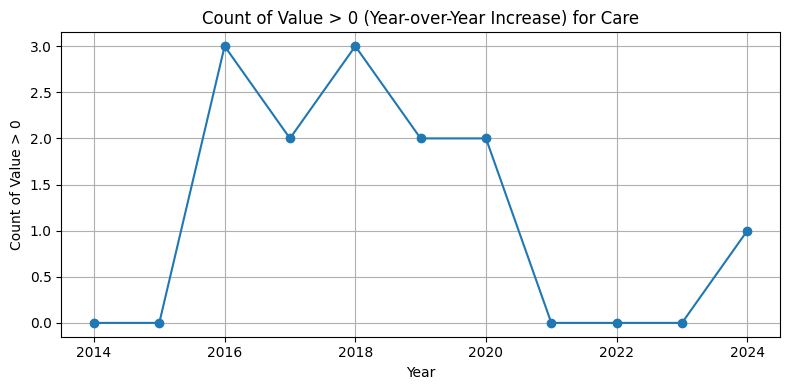

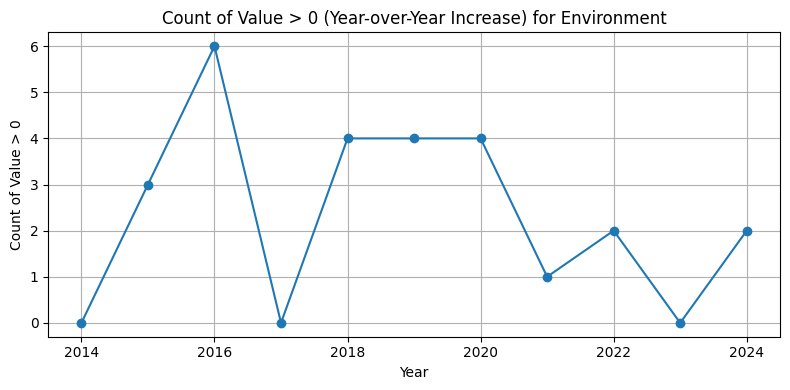

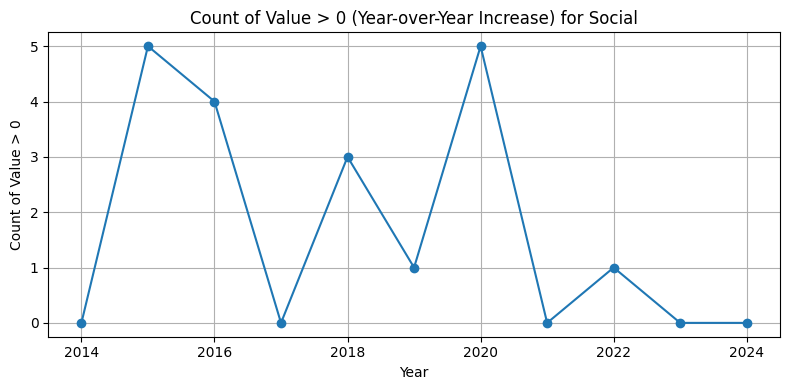

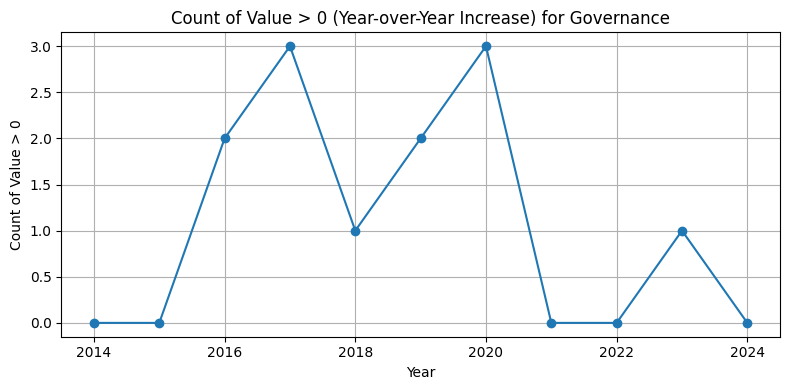

In [14]:
# Calculate year-over-year change for each score type
change_df = wide.copy()
for score in score_types:
    for i in range(1, len(years)):
        prev_col = f"{score}_{years[i-1]}"
        curr_col = f"{score}_{years[i]}"
        if prev_col in wide.columns and curr_col in wide.columns:
            change_df[curr_col] = wide[curr_col] - wide[prev_col]
        else:
            change_df[curr_col] = np.nan
    # Set the first year's change to NaN (no previous year)
    first_col = f"{score}_{years[0]}"
    if first_col in change_df.columns:
        change_df[first_col] = np.nan

# Plot count of value 1 for each year and score type in the change_df
for score in score_types:
    counts = []
    for year in years:
        col = f"{score}_{year}"
        if col in change_df.columns:
            count_1 = (change_df[col] >= 1).sum()
            counts.append(count_1)
        else:
            counts.append(0)
    plt.figure(figsize=(8, 4))
    plt.plot(years, counts, marker='o')
    plt.title(f'Count of Value > 0 (Year-over-Year Increase) for {score.capitalize()}')
    plt.xlabel('Year')
    plt.ylabel('Count of Value > 0')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Chart: Year-over-Year Increase Counts for ESG Scores

The line charts above display the annual count of companies that achieved a positive year-over-year increase in each ESG dimension—`care`, `environment`, `social`, and `governance`. For each chart, the x-axis represents the years, while the y-axis indicates the number of companies with an improvement in the respective ESG score compared to the previous year. This metric provides a dynamic view of progress, focusing on the prevalence of positive change rather than absolute score levels.

These charts are particularly useful for assessing the momentum of ESG improvement across the dataset. Peaks in the lines suggest periods when a large number of companies made significant strides in a particular dimension, potentially in response to new regulations, industry initiatives, or shifts in stakeholder expectations. Conversely, troughs may indicate challenging periods, such as economic downturns or increased operational difficulties, when fewer companies were able to advance their ESG performance.

By examining the patterns across different ESG dimensions, stakeholders can identify whether improvements are occurring in isolation or as part of a broader, coordinated effort. For example, simultaneous peaks in `environment` and `governance` may reflect the rollout of comprehensive sustainability programs, while divergent trends could signal varying levels of emphasis or success across dimensions.

The charts also facilitate the identification of persistent leaders—companies that consistently achieve year-over-year gains—and those that struggle to maintain progress. This information can inform targeted support, resource allocation, and the sharing of best practices. Additionally, the visualization helps contextualize aggregate trends, revealing whether observed improvements are widespread or concentrated among a few high performers.

In essence, these charts provide a dynamic, action-oriented perspective on ESG evolution, highlighting the frequency and distribution of positive change within the corporate landscape.

### Analysis of Year-over-Year Increase Counts for ESG Scores

The line charts illustrate the annual count of companies achieving a positive year-over-year increase in each ESG dimension—`care`, `environment`, `social`, and `governance`—from 2014 to 2024. The x-axis represents the years, and the y-axis shows the count of companies with improved scores compared to the previous year. This analysis examines trends, peaks, troughs, and comparative dynamics across the dimensions.

---

### Care Dimension Analysis

- **2014-2016:** Starts at 0.0, rises sharply to 3.0 by 2016, indicating a significant initial increase in companies improving care scores.
- **2016-2018:** Peaks at 2.0 in 2018, suggesting a moderate high point in care improvements.
- **2018-2020:** Declines to 2.0 in 2020, showing a stabilization with slight fluctuation.
- **2020-2022:** Drops to 0.0 in 2022, indicating a period with no companies showing improvement.
- **2022-2024:** Rises to 1.0 by 2024, reflecting a modest recovery.

**Trend:** Care shows an early surge, a peak in 2018, a significant dip in 2022, and a slight upturn by 2024, suggesting inconsistent momentum with a challenging period around 2022.

---

### Environment Dimension Analysis

- **2014-2016:** Starts at 0.0, rises sharply to 6.0 by 2016, marking the highest peak across all dimensions.
- **2016-2018:** Declines to 4.0 by 2018, indicating a strong but reduced improvement rate.
- **2018-2020:** Stabilizes at 4.0 in 2020, showing sustained progress.
- **2020-2022:** Drops to 1.0 in 2022, reflecting a significant decline.
- **2022-2024:** Rises to 2.0 by 2024, suggesting a partial recovery.

**Trend:** Environment exhibits the strongest initial growth, peaking in 2016, followed by a plateau, a sharp decline in 2022, and a modest rebound, indicating robust early adoption with later challenges.

---

### Social Dimension Analysis

- **2014-2016:** Starts at 0.0, rises to 5.0 by 2016, showing a strong initial increase.
- **2016-2018:** Drops to 4.0 in 2018, then rises to 5.0, indicating volatility with a recovery.
- **2018-2020:** Declines to 1.0 in 2020, marking a low point.
- **2020-2022:** Rises to 2.0 in 2022, showing a slight improvement.
- **2022-2024:** Drops to 0.0 by 2024, indicating no improvement.

**Trend:** Social displays early growth, volatility through 2018, a sharp decline in 2020, a slight uptick in 2022, and a complete drop-off by 2024, suggesting inconsistent progress.

---

### Governance Dimension Analysis

- **2014-2016:** Starts at 0.0, rises to 2.0 by 2016, indicating moderate early growth.
- **2016-2018:** Peaks at 1.5 in 2018, showing a slight dip and recovery.
- **2018-2020:** Rises to 3.0 by 2020, marking the highest point.
- **2020-2022:** Drops to 0.0 in 2022, indicating no improvement.
- **2022-2024:** Rises to 1.0 by 2024, reflecting a modest recovery.

**Trend:** Governance shows steady early growth, a peak in 2020, a significant drop in 2022, and a slight recovery by 2024, indicating variable momentum.

---

### Comparative Dynamics

- **Peak Performance:** Environment leads with a peak of 6.0 in 2016, followed by Social (5.0 in 2016 and 2018), Care (3.0 in 2016), and Governance (3.0 in 2020).
- **Troughs:** All dimensions hit 0.0 or near 0.0 in 2022 (Care and Governance at 0.0, Environment and Social near 1.0), suggesting a widespread challenge or external factor in that year.
- **Recovery:** By 2024, Care, Environment, and Governance show slight recoveries (1.0, 2.0, 1.0), while Social drops to 0.0, indicating divergent recovery patterns.

**Insight:** The 2016-2018 period saw strong initial improvements across all dimensions, with Environment and Social leading. The 2022 dip suggests a common external influence (e.g., economic or regulatory shifts), while recovery varies, with Environment showing the most resilience.

---

### Temporal Trends

- **2014-2016:** A broad surge across all dimensions, with Environment and Social peaking early, reflecting initial ESG adoption.
- **2018-2020:** Stabilization or peaks (Governance at 3.0), indicating sustained efforts amid fluctuations.
- **2022:** A universal low point, possibly linked to global events or policy changes.
- **2024:** Mixed recovery, with Environment showing the strongest rebound, while Social lags.

**Insight:** The data suggests a cyclical pattern with a significant setback in 2022, followed by uneven recovery, highlighting the need to investigate external drivers.

---

### Conclusion

The charts reveal distinct improvement patterns:
- **Environment** leads with the highest peak and moderate recovery, indicating strong early and sustained focus.
- **Social** shows volatility and a complete drop-off by 2024, suggesting inconsistent prioritization.
- **Care** and **Governance** exhibit moderate growth and recovery, with notable dips in 2022.

Stakeholders can use these trends to target support for lagging dimensions (e.g., Social in 2024), share best practices from Environment leaders, and investigate 2022 challenges to enhance future ESG momentum.

<Axes: >

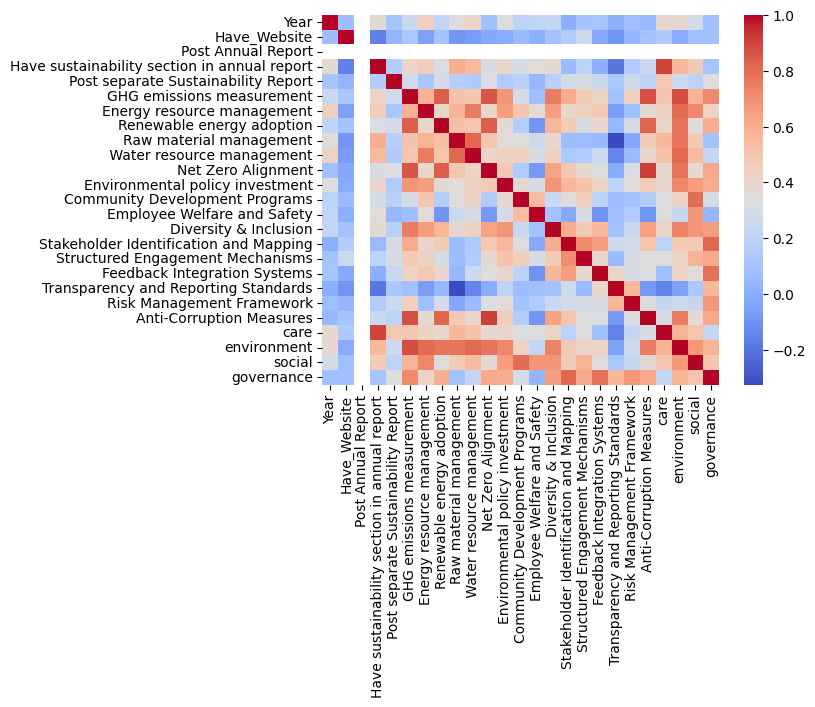

In [15]:
# Compute the correlation matrix for the main score features in wide
# Only use numeric features from 'wide' for correlation
num_cols = df_na.select_dtypes(include=[np.number]).columns
corr_matrix = df_na[num_cols].corr()
import seaborn as sns
sns.heatmap(corr_matrix,cmap ="coolwarm")

## Chart: Correlation Heatmap of ESG Features

The heatmap above visualizes the correlation matrix for all numeric ESG features in the dataset. Each cell in the heatmap represents the correlation coefficient between a pair of features, with the color intensity indicating the strength and direction of the relationship. Positive correlations are shown in warm colors (e.g., red), while negative correlations appear in cool colors (e.g., blue). The diagonal cells, representing self-correlation, are always the maximum value (1.0).

This chart is a powerful tool for uncovering the interdependencies among ESG dimensions. Strong positive correlations between features suggest that improvements in one area are often accompanied by gains in another. For example, a high correlation between `environment` and `care` scores may indicate that companies investing in environmental initiatives also tend to excel in stakeholder care or reporting practices. Conversely, weak or negative correlations highlight dimensions that evolve independently, suggesting that progress in one area does not necessarily translate to others.

The heatmap also aids in identifying potential redundancies or synergies within the dataset. Highly correlated features may capture similar aspects of ESG performance, while uncorrelated features provide unique, complementary information. This insight is valuable for both data reduction (e.g., in multivariate analyses) and strategic planning, as it helps prioritize areas where interventions are likely to have the broadest impact.

Furthermore, the visualization can reveal unexpected relationships or anomalies, prompting deeper investigation. For instance, a negative correlation between `governance` and `social` scores might warrant a review of underlying practices or data quality. The heatmap thus serves as both a diagnostic and exploratory tool, guiding subsequent analyses and decision-making.

In summary, the correlation heatmap provides a concise, visual summary of the relationships among ESG features, supporting holistic understanding and integrated strategy development.

## Reference

For further resources, code examples, and related ESG analytics, see the following repository:

[ESG GitHub Repository by mickiem123](https://github.com/mickiem123/ESG)